In [1]:
%pylab inline
import os, sys, glob
import time
import numpy as np
import pickle
import json

import matplotlib as mpl
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Load credential data 
from untappd_credentials import *

USER_NAME = 'ovarol'
#CLIENT_ID = "XXXXXXXXXXXXXX"
#CLIENT_SECRET = "XXXXXXXXXXXXXX"
#print 'Id:\t{}\nSecret:\t{}\n'.format(CLIENT_ID, CLIENT_SECRET)

In [3]:
# Using API from https://github.com/marshall91/pythonUntappd
import untappd_api as pythonUntappd

api = pythonUntappd.api(CLIENT_ID,CLIENT_SECRET)
userData = api.user_info(USER_NAME)['response']
#print json.dumps(userData, indent=4)

In [4]:
uniqueBeers = list()

count, keepCollect = 0, True
scanCount = 0
while keepCollect:
    resp = api.user_distinct_beers(USER_NAME, offset=count)['response']
    count += resp['beers']['count']
    uniqueBeers.extend(resp['beers']['items'])
    print 'Unique beers collected: {}'.format(len(uniqueBeers))
    scanCount += 1
    if resp['beers']['count'] <> 0:
        time.sleep(1)
    else:
        break

Unique beers collected: 25
Unique beers collected: 50
Unique beers collected: 75
Unique beers collected: 100
Unique beers collected: 125
Unique beers collected: 150
Unique beers collected: 175
Unique beers collected: 200
Unique beers collected: 225
Unique beers collected: 228
Unique beers collected: 228


In [5]:
#print json.dumps(uniqueBeers, indent=4, sort_keys=True)
print json.dumps(uniqueBeers[-1], indent=4, sort_keys=True)

{
    "beer": {
        "auth_rating": 0, 
        "beer_abv": 4.3, 
        "beer_description": "Swirling clouds tumble as the storm begins to calm. Settle. Breathe in the moment, then break through the smooth, light head to the bittersweet reward.\n\nUnmistakeably GUINNESS, from the first velvet sip to the last, lingering drop. And every deep-dark satisfying mouthful in between.\n\nPure beauty. Pure GUINNESS.\n\nGuinness Draught is sold in kegs, widget cans, and bottles. The ABV varies from 4.1 to 4.3%.\n\nGuinness Extra Cold is the exact same beer only served through a super cooler at 3.5 \u00b0C", 
        "beer_ibu": 45, 
        "beer_label": "https://untappd.akamaized.net/site/beer_logos/beer-_4473_8122008947804818c90640a06d83.jpeg", 
        "beer_name": "Guinness Draught", 
        "beer_slug": "guinness-guinness-draught", 
        "beer_style": "Stout - Irish Dry", 
        "bid": 4473, 
        "created_at": "Sat, 21 Aug 2010 09:26:35 +0000", 
        "rating_count": 393580,

In [5]:
# Check style counts
styleCounts = dict()
for b in uniqueBeers:
    if b['beer']['beer_style'] not in styleCounts:
        styleCounts[b['beer']['beer_style']] = 0
    styleCounts[b['beer']['beer_style']] += 1

for s in sorted(styleCounts, key=styleCounts.get, reverse=True):
    print s, styleCounts[s]

Stout - American Imperial / Double 13
Stout - Milk / Sweet 13
Stout - American 12
Porter - American 11
IPA - American 10
Stout - Oatmeal 8
IPA - Imperial / Double 8
Pale Ale - American 8
Brown Ale - American 8
Stout - Russian Imperial 8
Porter - Other 6
Stout - Other 6
Scotch Ale / Wee Heavy 5
Stout - Imperial / Double 4
Dunkelweizen 4
Lager - Pale 4
Fruit Beer 4
Pale Wheat Ale - American 4
Kölsch 3
Märzen 3
Spiced / Herbed Beer 3
Dark Ale 3
Strong Ale - American 3
Hefeweizen 3
Stout - Irish Dry 3
Rye Beer 3
Brown Ale - Imperial / Double 3
Pumpkin / Yam Beer 2
Lager - American Amber / Red 2
Lager - Helles 2
Red Ale - American Amber / Red 2
Lager - Dark 2
Cream Ale 2
Altbier 2
Pilsner - Other 2
IPA - Black / Cascadian Dark Ale 2
Belgian Quad 2
Belgian Strong Dark Ale 2
Barleywine - American 2
Pale Ale - Belgian 2
Porter - English 2
Witbier 2
Sour - Flanders Red Ale 1
IPA - Session / India Session Ale 1
Blonde Ale - Belgian Blonde / Golden 1
Gluten-Free 1
English Mild Ale 1
Shandy / Radl

In [6]:
# Most preferred brewery
breweryCount = dict()
for b in uniqueBeers:
    if b['brewery']['brewery_name'] not in breweryCount:
        breweryCount[b['brewery']['brewery_name']] = 0
    breweryCount[b['brewery']['brewery_name']] += 1

for s in sorted(breweryCount, key=breweryCount.get, reverse=True):
    print s, breweryCount[s]

New Holland Brewing Company 16
Bell's Brewery 12
Boston Beer Company 9
Bare Hands Brewery 8
Evil Czech Brewery 8
Upland Brewing Company 7
South Bend Brew Werks 6
Founders Brewing Co. 6
Goshen Brewing Company 6
Market Garden Brewery 6
Crooked Ewe Brewery 5
Stone Brewing 5
The Tap Brewery 4
Alltech Lexington Brewing & Distilling Co. 4
Anadolu Efes 4
Left Hand Brewing Company 4
Jackalope Brewing Company 4
Lagunitas Brewing Company 3
Greenbush Brewing Company 3
Samuel Smith's Old Brewery 3
Goose Island Beer Co. 3
Brauerei Beck 3
Rogue Ales & Spirits 3
Breckenridge Brewery 3
Dogfish Head Craft Brewery 3
Quaff ON! Brewing Company 3
Charles Wells Brewery 3
Saugatuck Brewing Company 3
Sierra Nevada Brewing Co. 2
Yazoo Brewing Company 2
Boulevard Brewing Co. 2
Short's Brewing Company 2
Fountain Square Brewing Company 2
Kona Brewing Company 2
Erdinger Weissbräu 2
Jacob Leinenkugel Brewing Company 2
Arrogant Brewing 2
Two Brothers Brewing Company 2
Round Barn Brewery 2
Kulmbacher Brauerei 2
Balla

In [18]:
for b in sorted(uniqueBeers, key=lambda x: x['rating_score'], reverse=True)[:30]:
    print b['brewery']['brewery_name'], b['beer']['beer_name'], b['rating_score']

Bell's Brewery Black Note Stout (2016) 4.75
Dogfish Head Craft Brewery Raison D'Extra 4.75
Alltech Lexington Brewing & Distilling Co. Kentucky Bourbon Barrel Barleywine 4.75
New Holland Brewing Company Pure Brews Porter 4.75
New Holland Brewing Company Dragon's Milk Reserve: With Basil 4.75
New Holland Brewing Company Dragon's Milk Reserve: Raspberry Lemon 4.75
Crooked Ewe Brewery Bourbon Barrel Aged Wendigo 4.75
Adnams Tally-Ho Reserve 2012 4.75
Upland Brewing Company Teddy Bear Kisses 4.75
New Holland Brewing Company Dragon's Milk 4.75
Brewery Ommegang Three Philosophers (2016) 4.5
Alltech Lexington Brewing & Distilling Co. Kentucky Honey Barrel Brown Ale (2016) 4.5
Jackalope Brewing Company Spruce Beersteen 4.5
Jackalope Brewing Company Snowman Stout 4.5
Yazoo Brewing Company Sue 4.5
Evil Twin Brewing Aún Más A Jesús 4.5
South Bend Brew Werks Dead Bodies In the Beer Cellar 4.5
Bell's Brewery Special Double Cream Stout 4.5
Georgetown Trading Co James E Pepper 1776 4.5
Mother's Brewin

Avg. IBU: 28.8377192982
Avg. ABV: 6.81600877193


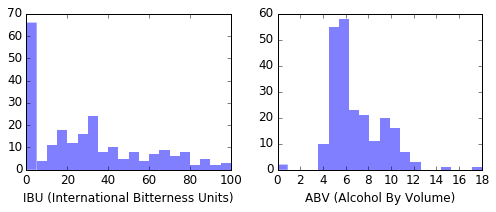

In [7]:
ibuList, abvList = list(), list()
for b in uniqueBeers:
    ibuList.append(b['beer']['beer_ibu'])
    abvList.append(b['beer']['beer_abv'])
    
print 'Avg. IBU: {}'.format(np.mean(ibuList))
print 'Avg. ABV: {}'.format(np.mean(abvList))

fig, axarr = plt.subplots(1, 2, figsize=(7,3))
axarr[0].hist(ibuList, bins=20, alpha=0.5, linewidth=0)
axarr[0].set_xlabel('IBU (International Bitterness Units)', fontsize=12)
axarr[0].tick_params(axis='both', which='major', labelsize=12)

axarr[1].hist(abvList, bins=20, alpha=0.5, linewidth=0)
axarr[1].set_xlabel('ABV (Alcohol By Volume)', fontsize=12)
axarr[1].tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()


(228, 2)


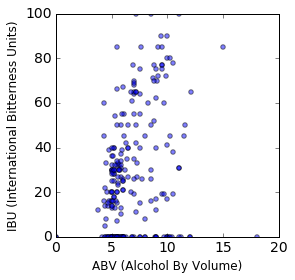

In [8]:
# Beer ABV vs IBU
beerMeasures = list()
for b in uniqueBeers:
    beerMeasures.append((b['beer']['beer_abv'],b['beer']['beer_ibu']))
beerMeasures = np.array(beerMeasures)
print beerMeasures.shape

fig = plt.figure(figsize=(4,4))
plt.scatter(beerMeasures[:,0], beerMeasures[:,1], alpha=0.5)
plt.xlim(xmin=0)
plt.ylim((0,100))
plt.xlabel('ABV (Alcohol By Volume)', fontsize=12)
plt.ylabel('IBU (International Bitterness Units)', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=14)

2.0 4.75


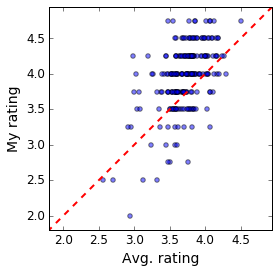

In [9]:
# Scatter plot of avg. ratings vs. my ratings
scatterData = list()
for b in uniqueBeers:
    if b['beer']['rating_score'] == 0:
        continue
    scatterData.append((b['beer']['rating_score'], b['rating_score']))
scatterData = np.array(scatterData)    

fig = plt.figure(figsize=(4,4))
plt.plot([0,5],[0,5],'r--', linewidth=2)
plt.scatter(scatterData[:,0], scatterData[:,1], alpha=0.5)

minV, maxV = np.min(scatterData), np.max(scatterData)
print minV, maxV
plt.xlim((minV-0.2, maxV+0.2))
plt.ylim((minV-0.2, maxV+0.2))
plt.xlabel('Avg. rating', fontsize=14)
plt.ylabel('My rating', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)

(226, 3)


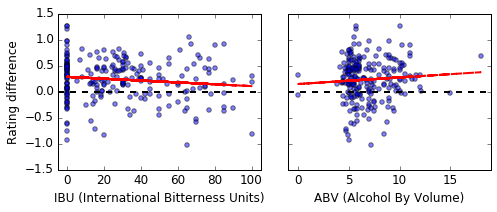

In [11]:
# What kind of beers I like more than avg. people
scatterData = list()
for b in uniqueBeers:
    if b['beer']['rating_score'] == 0:
        continue
    scatterData.append((b['rating_score'] - b['beer']['rating_score'], 
                        b['beer']['beer_abv'],
                        b['beer']['beer_ibu']))
scatterData = np.array(scatterData)    
print scatterData.shape

fig, axarr = plt.subplots(1, 2, figsize=(7,3), sharey=True)
axarr[0].scatter(scatterData[:,2], scatterData[:,0], alpha=0.5)
axarr[0].axhline(y=0, c='k', linewidth=2, linestyle='--')
fit = np.polyfit(scatterData[:,2], scatterData[:,0], 1)
fit_fn = np.poly1d(fit) 
axarr[0].plot(scatterData[:,2], fit_fn(scatterData[:,2]), 'r--', linewidth=2)
axarr[0].set_xlim(xmin=-5, xmax=105)
axarr[0].set_xlabel('IBU (International Bitterness Units)', fontsize=12)
axarr[0].set_ylabel('Rating difference', fontsize=12)
axarr[0].tick_params(axis='both', which='major', labelsize=12)

axarr[1].scatter(scatterData[:,1], scatterData[:,0], alpha=0.5)
axarr[1].axhline(y=0, c='k', linewidth=2, linestyle='--')
fit = np.polyfit(scatterData[:,1], scatterData[:,0], 1)
fit_fn = np.poly1d(fit) 
axarr[1].plot(scatterData[:,1], fit_fn(scatterData[:,1]), 'r--', linewidth=2)
axarr[1].set_xlim(xmin=-1, xmax=max(scatterData[:,1])+1)
axarr[1].set_xlabel('ABV (Alcohol By Volume)', fontsize=12)
axarr[1].tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()


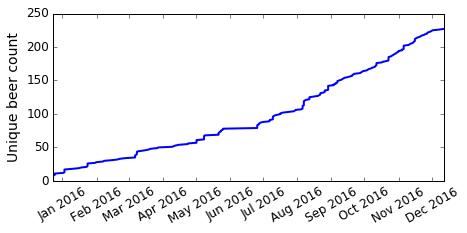

In [13]:
# Cumulative beer discoveries
dTimes = list()
for b in uniqueBeers:
    dTimes.append(datetime.datetime.strptime(b['first_created_at'].split(' -')[0],
                                             '%a, %d %b %Y %H:%M:%S'))
dTimes.sort()
    
fig = plt.figure(figsize=(7,3))
plt.plot(dTimes, range(len(dTimes)), linewidth=2)
plt.ylabel('Unique beer count', fontsize=14)
plt.xticks(rotation=30)
plt.tick_params(axis='both', which='major', labelsize=12)